In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
data_path = '../parsed/parsed.csv'
nrows = 1000

In [3]:
# TODO stemming lemmatization tokenization

In [4]:
df = pd.read_csv(data_path, parse_dates=['dtm'], converters={"tags": literal_eval})# , nrows=nrows) 
# let's see how df looks and get some basic info
print (df)

             id  data-story-long  rating meta-rating  author_id  comments  \
0       7337284             True  7727.0    7884:157    1002684       479   
1       7337282             True    15.0       25:10    2008181         6   
2       7337254             True    28.0       39:11    2522374         2   
3       7337245             True     6.0       18:12    3073815        13   
4       7337246             True    21.0        28:7    3156206         8   
...         ...              ...     ...         ...        ...       ...   
135371  7185786             True    63.0        72:9    2660666        23   
135372  7185784             True  2080.0    2333:253    2456769       487   
135373  7185777             True     1.0        10:9    2940548        15   
135374  7185769             True  8712.0    8882:170    2423817       782   
135375  7185759             True    18.0        19:1     899515         1   

                              dtm  views  saves       author_name  \
0     

In [5]:
df.count()

id                 135376
data-story-long    135376
rating             132849
meta-rating        135376
author_id          135376
comments           135376
dtm                134985
views                   0
saves              135376
author_name        135376
title              135376
tags               135376
text               135376
dtype: int64

In [6]:
# Well, there are no views in dataset, pikubu doesn't return it within html response when using search. 
# Instead it shows something like "Loading views count...", guess this loading is being made by js
# Let's drop this column
df.drop(columns=["views"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135376 entries, 0 to 135375
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               135376 non-null  int64  
 1   data-story-long  135376 non-null  bool   
 2   rating           132849 non-null  float64
 3   meta-rating      135376 non-null  object 
 4   author_id        135376 non-null  int64  
 5   comments         135376 non-null  int64  
 6   dtm              134985 non-null  object 
 7   saves            135376 non-null  int64  
 8   author_name      135376 non-null  object 
 9   title            135376 non-null  object 
 10  tags             135376 non-null  object 
 11  text             135376 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.5+ MB


array([[<AxesSubplot:title={'center':'dtm'}>]], dtype=object)

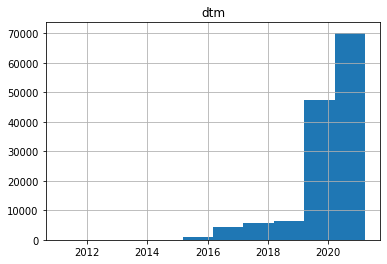

In [7]:
# let's see how posts are distributed by datetime
filtered_dtm = pd.DataFrame(df[~pd.isnull(df["dtm"])]["dtm"].apply(lambda x: x.replace(tzinfo=None)))
filtered_dtm.hist()

In [8]:
# let's delete things that we don't need anymore to save some ram
del filtered_dtm

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

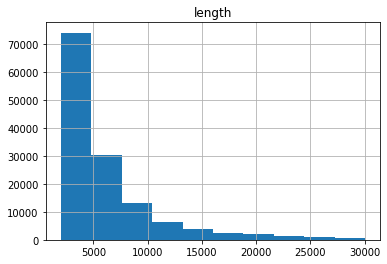

In [9]:
# and by lengths
df["length"] = np.array(df["text"].apply(len))
df.hist("length")

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

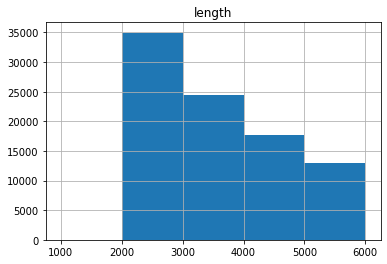

In [10]:
df.hist("length", bins=[1000, 2000, 3000, 4000, 5000, 6000])  # double check that there are no texts below 2000 characters

In [11]:
df["length"].describe()

count    135376.000000
mean       6084.318247
std        4762.545067
min        2000.000000
25%        2962.000000
50%        4426.000000
75%        7219.000000
max       30050.000000
Name: length, dtype: float64

In [12]:
# let's grab tags frequency and make hist out of them
df_tags = pd.DataFrame([tag.lower() for tag_list in df["tags"] for tag in tag_list])
tags_counts = df_tags.value_counts()

figsize = 20, 5  # declare this for further hists

len(tags_counts)  # uniue tags

46325

<AxesSubplot:xlabel='0'>

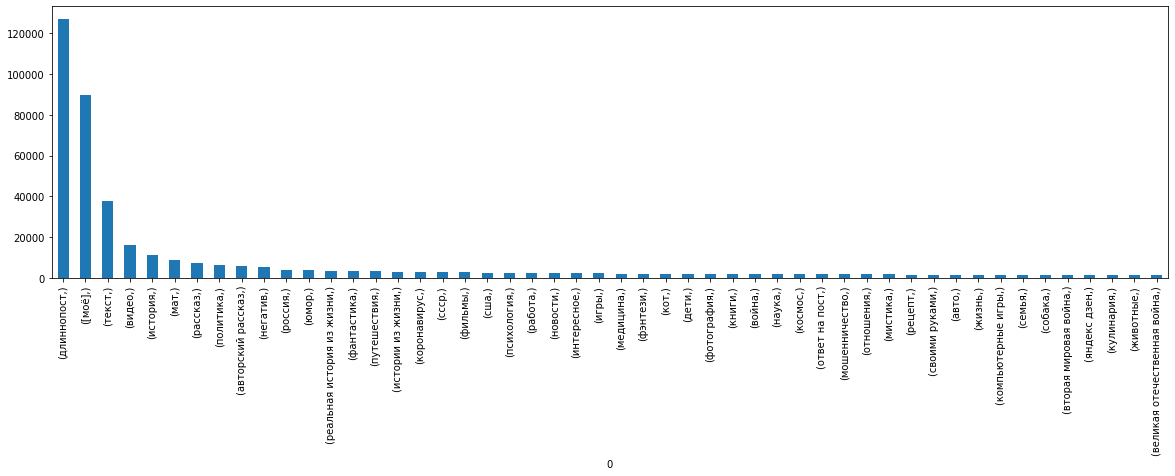

In [13]:
tags_counts[:50].plot(kind='bar', figsize=figsize)

<AxesSubplot:xlabel='0'>

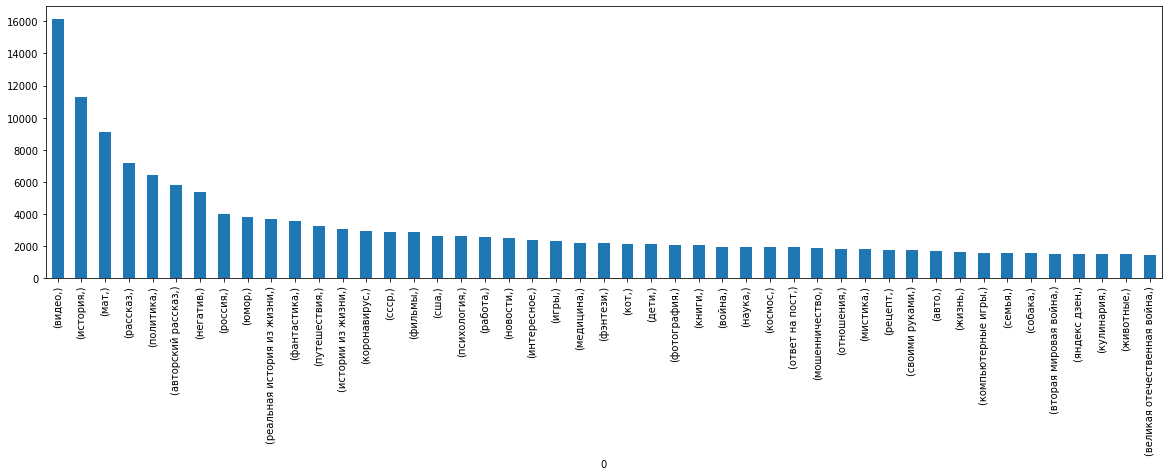

In [14]:
tags_counts[3:50].plot(kind='bar', figsize=figsize)  # now let's take a closer look at the same hist but without first 3 tags

<AxesSubplot:xlabel='0'>

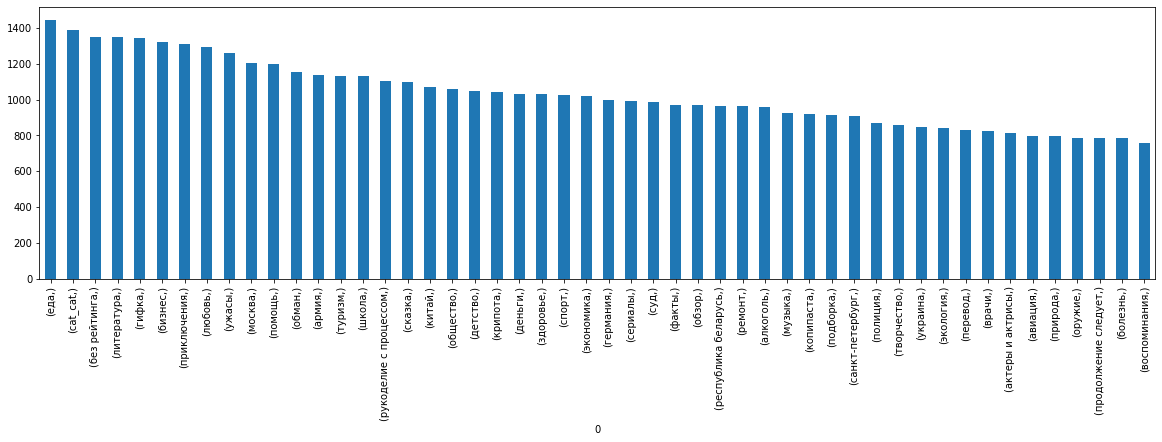

In [15]:
tags_counts[50:100].plot(kind='bar', figsize=figsize)

In [16]:
del tags_counts
del df_tags

In [17]:
# and let's make hists for words from titles and bodies too, why not
df_titles = pd.DataFrame([word.lower() for title in df["title"] for word in title.split(" ")])
titles_counts = df_titles.value_counts()
titles_counts  # very dirty

в                     24631
и                     20684
как                   14163
на                    13882
с                      7949
                      ...  
заграница?                1
заграницей?!              1
заграницу                 1
заграницу(венгрия)        1
™                         1
Length: 185803, dtype: int64

<AxesSubplot:xlabel='0'>

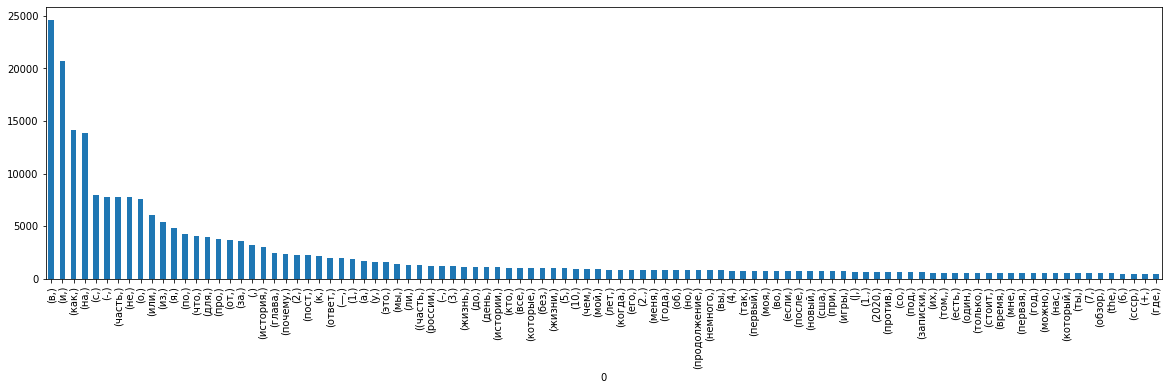

In [18]:
titles_counts[:100].plot(kind='bar', figsize=figsize)

In [19]:
del titles_counts
del df_titles

In [20]:
from collections import Counter

def text_values_count(texts):
    res = Counter()
    for text in texts:
        cnt = Counter(text.split(" "))
        res.update(cnt)
    return res

In [ ]:
# for bodies
# be careful! this takes A LOT of ram. do not try on large datasets.
if nrows < 10000:
    bodies_counts = pd.Series(np.concatenate(df["text"].str.split())).value_counts()
    bodies_counts[:100].plot(kind='bar', figsize=figsize)
    del bodies_counts
else:
    print("Skipped")

In [ ]:
r = text_values_count(df["text"])
r

In [ ]:
# now let's see how rating is distributed
df["rating"].describe()

In [ ]:
df["rating"].hist(bins=[-1000, 0, 200, 500, 1000, 2000, 3000, 5000])